## Brain activity notebook series

### [EEGS 10–20 system](https://www.kaggle.com/code/seshurajup/eegs-10-20-system)
Better understanding eegs 10-20 system
### [Missing Eeg_ids Train.csv vs train_eegs [Resolved]](https://www.kaggle.com/code/seshurajup/missing-eeg-ids-in-train-csv-vs-train-eegs-parquet)
Extra training eggs [Resolved] as we can ignore it
### [EDA train.csv](https://www.kaggle.com/code/seshurajup/eda-train-csv)
Detailed analysis of the train.csv
### [Eegs Pairing Analysis & Features](https://www.kaggle.com/code/seshurajup/eegs-pairing-analysis-features)
Pairing features analysis and build features
### [Eegs Target Analysis - Correct way to merge target](https://www.kaggle.com/code/seshurajup/eegs-target-analysis-correct-way-to-merge-target)
How to choice the target votes for training
### [Eegs Train Split (CV)](https://www.kaggle.com/seshurajup/eegs-train-splits-cv)
generate better train split without patient_id overlap

#### **Upvote my work if it is useful**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("/kaggle/input/hms-harmful-brain-activity-classification/train.csv")
train['targets'] = train.apply(lambda x: f"{x['expert_consensus']}-{x['seizure_vote']}-{x['lpd_vote']}-{x['gpd_vote']}-{x['lrda_vote']}-{x['grda_vote']}-{x['other_vote']}", axis=1)

Go through the discussion for better understanding - [Correct way to merge targets](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/467127)

-- **common sequence of all sub-sequences is 40secs-50secs**
-- target votes are do not changed, so my guess is we can ignore the 0-40secs and 50secs-90secs sequence as it not given any importance to the targets ( as expert decided based on sub-sequence spike )

or 0-40secs, 50secs-90secs is weak labels approach

In [ ]:
check = train.loc[train[ 'eeg_id' ]==1628180742]
check

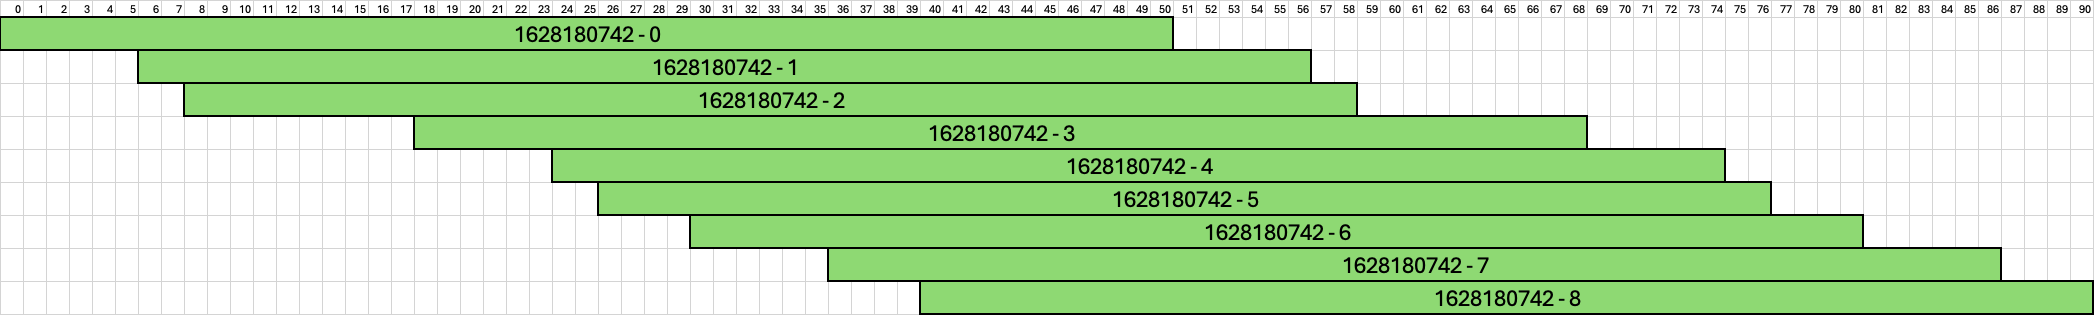

In [ ]:
check['targets'].unique()

## Majorly 40-50secs is the reason for selecting Seizure, as without 0-40 and 50-90 do not impacted the egg_id=1628180742 target votes

## CV - no patient shared between train and test

In [ ]:
train

In [ ]:
unique_targets_count = dict(train.groupby(['patient_id'])['targets'].nunique().value_counts(dropna=False))
plt.figure(figsize=(10, 6))
plt.bar(list(unique_targets_count.keys()), list(unique_targets_count.values()), color='skyblue')
plt.title('Unique Targets Count per Patient')
plt.xlabel('Unique Targets Count')
plt.ylabel('# patient ids')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
unique_targets_count = dict(train.groupby(['eeg_id'])['targets'].nunique().value_counts(dropna=False))
plt.figure(figsize=(10, 6))
plt.bar(list(unique_targets_count.keys()), list(unique_targets_count.values()), color='skyblue')
plt.title('Unique Targets Count per EEG ID')
plt.xlabel('Unique Targets Count')
plt.ylabel('# EEG ids')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
unique_targets_count 

In [ ]:
unique_targets_count[1]/sum([v for _,v in unique_targets_count.items()])

In [ ]:
unique_targets_count = dict(train.groupby(['spectrogram_id'])['targets'].nunique().value_counts(dropna=False))
plt.figure(figsize=(10, 6))
plt.bar(list(unique_targets_count.keys()), list(unique_targets_count.values()), color='skyblue')
plt.title('Unique Targets Count per Spectrogram ID')
plt.xlabel('Unique Targets Count')
plt.ylabel('# Spectrogram ids')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
unique_targets_count = train.groupby(['expert_consensus'])['targets'].nunique()
plt.figure(figsize=(10, 6))
unique_targets_count.plot(kind='bar', color='skyblue')
plt.title('Unique Targets Count per Expert Consenus')
plt.xlabel('Expert Consensus')
plt.ylabel('Unique Targets Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## [Aggregating votes of overlapping rows and create a new expert consensus.by @gunesevitan](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/467127#2597589)
